In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

<h1 align="center">Course project for Ml course September 2019 in Softuni</h1><br>
 <p>The goal of this project is to explore a nba data set and predict what are the main stats that keep players in the league atleast for 5 yearsand more.The models used will be linear regresion. Decision trees and Random Forest. The csv file was obtained from data-world web site and consist of 1340 observations with 21 attributes.<br>
The image bellow shows the name of attributes used in the set and their human readable description and meaning</p>

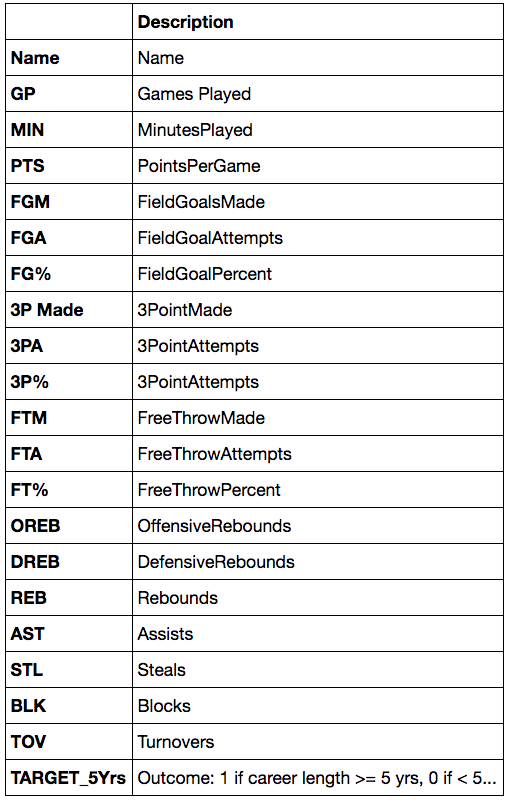


<h4 align ="center">Data exploration</h4>
<p> Just some pure data exploration. I am pretty familiar with the topic of the project being playing the game of basketball
for 25 years. But I still have to check and verify my data.</p>

In [11]:
nba_data =pd.read_csv("datasets/nba_logreg.csv",sep=",")


In [12]:
nba_data.describe

<bound method NDFrame.describe of                  Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   
...               ...  ..   ...  ...  ...  ...   ...      ...  ...   ...  ...   
1335      Chris Smith  80  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  ...   
1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  ...   
1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  ...   
1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  ...   
1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  .

In [13]:
nba_data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [14]:
nba_data.groupby('TARGET_5Yrs').size()

TARGET_5Yrs
0.0    509
1.0    831
dtype: int64

In [15]:
nba_data.mean()

GP             60.414179
MIN            17.624627
PTS             6.801493
FGM             2.629104
FGA             5.885299
FG%            44.169403
3P Made         0.247612
3PA             0.779179
3P%            19.308126
FTM             1.297687
FTA             1.821940
FT%            70.300299
OREB            1.009403
DREB            2.025746
REB             3.034478
AST             1.550522
STL             0.618507
BLK             0.368582
TOV             1.193582
TARGET_5Yrs     0.620149
dtype: float64

In [16]:
nba_data.shape

(1340, 21)

In [17]:
nba_data.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.0,82.0
MIN,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.9,40.9
PTS,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.8,28.2
FGM,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.4,10.2
FGA,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.5,19.8
FG%,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.9,73.7
3P Made,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.4,2.3
3PA,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.2,6.5
3P%,1329.0,19.308126,16.022916,0.0,0.000,22.40,32.5,100.0
FTM,1340.0,1.297687,0.987246,0.0,0.600,1.00,1.6,7.7


In [18]:
nullData=nba_data.isnull().sum()
print(nullData)

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


In [19]:
nba_data = nba_data.dropna(axis=0, subset=['3P%'])
afterClearingNull=nba_data.isnull().sum()
print(afterClearingNull)

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


In [20]:
corr_data =nba_data.drop(["TARGET_5Yrs","OREB","DREB"],axis=1);

In [21]:
corr=corr_data.corr(method='pearson')
corr.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Oranges'), axis=0)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,REB,AST,STL,BLK,TOV
GP,1.0,0.59,0.54,0.54,0.52,0.3,0.11,0.1,0.038,0.48,0.48,0.2,0.46,0.37,0.45,0.28,0.52
MIN,0.59,1.0,0.91,0.9,0.91,0.21,0.39,0.4,0.17,0.79,0.78,0.24,0.71,0.63,0.76,0.4,0.83
PTS,0.54,0.91,1.0,0.99,0.98,0.26,0.35,0.36,0.15,0.9,0.88,0.25,0.68,0.55,0.67,0.39,0.85
FGM,0.54,0.9,0.99,1.0,0.98,0.3,0.29,0.3,0.12,0.85,0.84,0.22,0.69,0.53,0.66,0.4,0.83
FGA,0.52,0.91,0.98,0.98,1.0,0.14,0.39,0.41,0.2,0.83,0.81,0.26,0.62,0.59,0.69,0.33,0.85
FG%,0.3,0.21,0.26,0.3,0.14,1.0,-0.29,-0.35,-0.33,0.25,0.31,-0.15,0.47,-0.1,0.061,0.39,0.13
3P Made,0.11,0.39,0.35,0.29,0.39,-0.29,1.0,0.98,0.59,0.16,0.093,0.31,-0.071,0.37,0.31,-0.16,0.26
3PA,0.1,0.4,0.36,0.3,0.41,-0.35,0.98,1.0,0.58,0.17,0.11,0.32,-0.079,0.41,0.34,-0.17,0.28
3P%,0.038,0.17,0.15,0.12,0.2,-0.33,0.59,0.58,1.0,0.03,-0.032,0.33,-0.19,0.26,0.19,-0.24,0.11
FTM,0.48,0.79,0.9,0.85,0.83,0.25,0.16,0.17,0.03,1.0,0.98,0.25,0.66,0.47,0.6,0.41,0.8


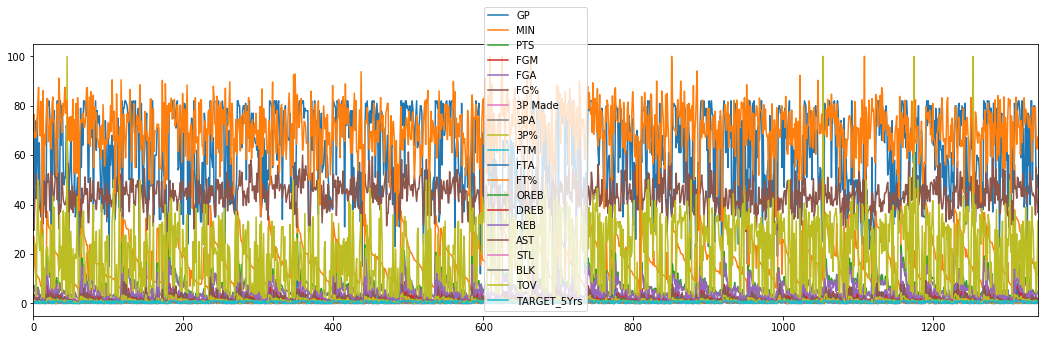

In [22]:
nba_data.plot(figsize=(18,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ccce38fd0>,
      dtype=object)

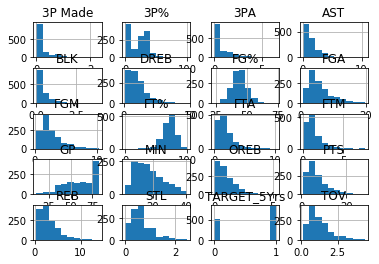

In [23]:
nba_data.hist()

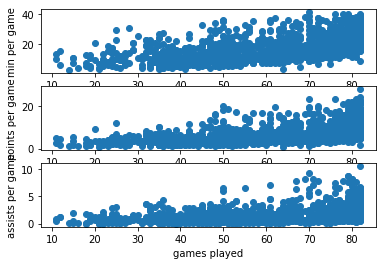

In [24]:
fig, (ax0,ax1, ax2) = plt.subplots(3)

ax0.scatter(nba_data['GP'],nba_data['MIN'])
ax0.set_xlabel("games played").set_size(10)
ax0.set_ylabel("min per game").set_size(10)
ax1.scatter(nba_data['GP'],nba_data['PTS'])
ax1.set_xlabel("games played").set_size(10)
ax1.set_ylabel("points per game").set_size(10)
ax2.scatter(nba_data['GP'],nba_data['AST'])
ax2.set_xlabel("games played").set_size(10)
ax2.set_ylabel("assists per game").set_size(10)

plt.show() 

<h4 align="center"> Data exploration observations</h4>
<p>
So what we saw. Our data was mostly correct and with little need of manipulation. We had 9 null values and I just decided to remove them. Also most of our colums war floats or ints and values that were in right dimensions. Only column that would have been problem was the names but we removed it.Maybe if go for some clasification or what ever modeling it can be used but not in this case.<br>
    The corellation showed us expected results games,minutes and points are in close relation.Also the scatter plot showed the same picture and some outliers which aer to be expected, but not in such quantity so we need to worry about them.
</p>
<h4 align="center">Working with the data</h4><p> Starting with the straight forward Logistic regression from skitlearn library and default values for normalization and scorring our model after that</p>

In [25]:
nba_features=nba_data.drop(["Name","TARGET_5Yrs"],axis=1);
nba_labels=nba_data.TARGET_5Yrs

In [26]:
nba_features_train,nba_features_test,nba_labels_train,nba_labels_test = train_test_split(nba_features,nba_labels,train_size = 0.7,test_size = 0.3)

In [27]:
print("nba_features_train:", nba_features_train.shape)
print("nba_labels_train:", nba_labels_train.shape)
print("nba_features_test:", nba_features_test.shape)
print("nba_labels_test:", nba_labels_test.shape)

nba_features_train: (930, 19)
nba_labels_train: (930,)
nba_features_test: (399, 19)
nba_labels_test: (399,)


In [28]:
tuned_params = [{"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1e6], 
                 "max_iter": [1, 5, 10, 20, 30, 50, 100, 300, 1000],
                 "fit_intercept": [True,False]}]
grid_search = GridSearchCV(LogisticRegression(), tuned_params, scoring = "f1" )
best_model = grid_search.fit(nba_features_train, nba_labels_train)
best_params_ = best_model.best_estimator_.get_params()
y_pred = best_model.predict_proba(nba_features_test)[:, 1]
score = best_model.score(nba_features_test, nba_labels_test)
precision, recall, _ = roc_curve(nba_labels_test, y_pred, pos_label = 1)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/sit

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-pa

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/s

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
print("Best params:", best_params_)
print("Best score:", round(grid_search.best_score_, 3))
print("Score:", round(score, 3))

Best params: {'C': 1000000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 20, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best score: 0.781
Score: 0.778


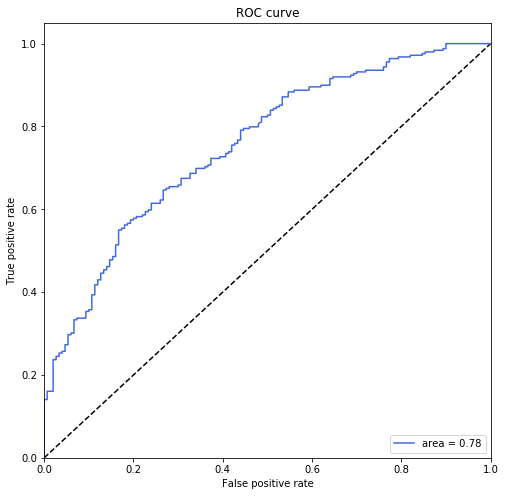

In [30]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.plot([0, 1], [0, 1], "k--")
plt.plot(precision, recall, color="royalblue", label="area = %0.2f" % score)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.show()

<h4 align="center">Results</h4>
<p>
Our model scored just 0.78, I was a bit surprised, expected a bit more.But if we think about it data is with a lot of variance,and we dont have grouping about position on which certain players play.And this will be pretty much one of the main informations our model will need.So we will need either to find or use a tool to get all players position. Or using the knowledge about the game to fill it manually. but maybe as with names it maybe done in the future.<br>
   What is more interesting, the best paramters were with c-10 so our model don't need a lot of regularisation and our roc curve is on the positive end,near the to the upper edge so we hit a lot of true positives.<br>
    So maybe with some feature manipulations we can up our score but the point is to just explore the data let's try how different models will deal with it.<br>
    Next model is DecisionTree
</p>

In [33]:
model_dt = DecisionTreeClassifier().fit(nba_features_train, nba_labels_train )
y_pred_dt = model_dt.predict_proba(nba_features_test)[:, 1]
score_dt = model_dt.score(nba_features_test, nba_labels_test )
precision_dt, recall_dt, _ = roc_curve(nba_labels_test, y_pred_dt, pos_label = 1)
print(round(score_dt,3))

0.579


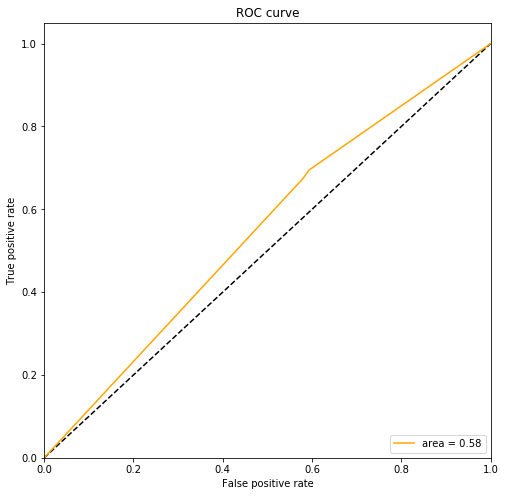

In [34]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(precision_dt, recall_dt, color="orange", label='area = %0.2f' % score_dt)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<p>As expected the nature of decision trees is working against us and the result is lower only 0.57 vs 0.77 compared with logistic regression. And th roc curve is way worse but still some what on the positive side. So what are our options Try with multiple trees with mixing the stats and repeating. Looking in skitlearn library there is quit a few options. But in this case whhy not StratifiedKFold with somewhat default  hyper params</p>

In [35]:
kfold = StratifiedKFold(n_splits=5).split(nba_features_train, nba_labels_train)
params = [{"max_depth": [1, 5, 7, 15, 20], 
                 "min_samples_leaf": [2, 5, 10], 
                 "max_leaf_nodes":[5, 10, 20, 30]}]
grid_search_kfold = GridSearchCV(DecisionTreeClassifier(), params, cv = kfold, scoring = "f1")
best_model_kfold = grid_search_kfold.fit(nba_features_train,nba_labels_train)
best_kfold_params_ = grid_search_kfold.best_estimator_.get_params()
y_pred_kfold = best_model_kfold.predict_proba(nba_features_test)[:, 1]
score_kfold = best_model_kfold.score(nba_features_test, nba_labels_test)
precision_kfold, recall_kfold, _ = roc_curve(nba_labels_test, y_pred_kfold, pos_label = 1)
print("Best params:", best_kfold_params_)
print("Best score:", round(grid_search_kfold.best_score_, 3))
print("Score:", round(score_kfold, 3))

Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
Best score: 0.775
Score: 0.765


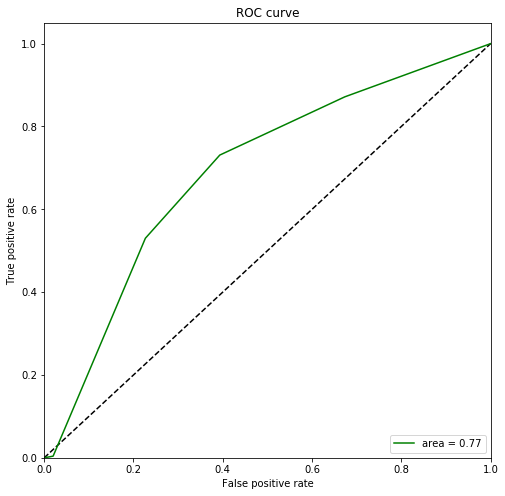

In [36]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(precision_kfold, recall_kfold, color="green", label='area = %0.2f' % score_kfold)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
kfold = StratifiedKFold(n_splits=10).split(nba_features_train,nba_labels_train)
params = [{"n_estimators": [5, 10, 20, 50, 100],
           "max_depth": [2, 5, 10]}]
grid_search_rf = GridSearchCV(RandomForestClassifier(), params, cv = kfold, scoring = "f1")
best_model_rf = grid_search_rf.fit(nba_features_train, nba_labels_train)
best_rf_params_ = grid_search_rf.best_estimator_.get_params()
y_pred_rf = best_model_rf.predict_proba(nba_features_test)[:, 1]
score_rf = best_model_rf.score(nba_features_test, nba_labels_test)
precision_rf, recall_rf, _ = roc_curve(nba_labels_test, y_pred_rf, pos_label = 1)
print("Best params:", best_rf_params_)
print("Best score:", round(grid_search_rf.best_score_, 3))
print("Score:", round(score_rf, 3))

Best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best score: 0.78
Score: 0.78


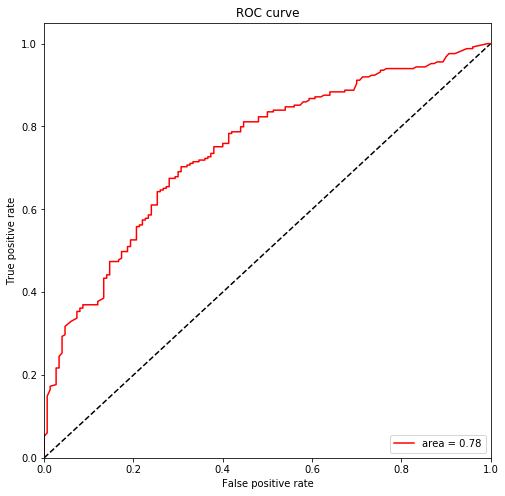

In [38]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(precision_rf, recall_rf, color="red", label='area = %0.2f' % score_rf)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
target_1 = f1_score(nba_labels_test, grid_search_rf.best_estimator_.predict(nba_features_test), pos_label=0)
target_2 = f1_score(nba_labels_test, grid_search_rf.best_estimator_.predict(nba_features_test), pos_label=1)

print("no 5 years:", round(target_1, 3))
print("yes 5 years:", round(target_2, 3))
print("best_params_:", grid_search_rf.best_params_  )
print("best_score_:", round(grid_search_rf.best_score_ , 3))

no 5 years: 0.558
yes 5 years: 0.78
best_params_: {'max_depth': 2, 'n_estimators': 20}
best_score_: 0.78


<p>So as we saw from our graphics above neither using kfold stratifed  with either decisionTreeClasifier or randomForestClasifier improved our score significantly. The best we were able to do is to get result comparable with the logistic regression model. And as the graph show bellow  Logistic regression and the kfolded randomforest classifier are with the same score <br> So in our case the best way to go is Linear regression as it is easiest to impliment. And if we want to have better results we have to think more about our data and how to manipulate it further </p>

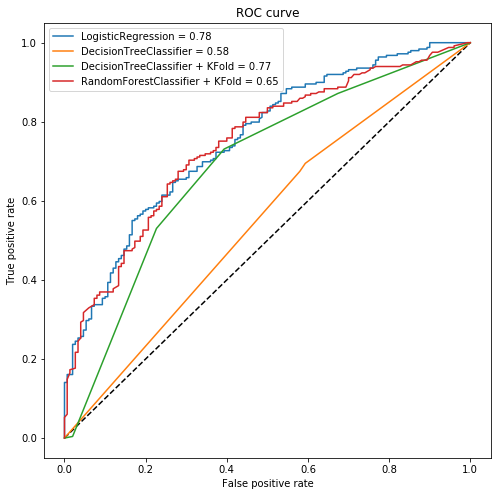

In [42]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(precision, recall, label=('LogisticRegression = %0.2f' % score))
plt.plot(precision_dt, recall_dt, label=('DecisionTreeClassifier = %0.2f' % score_dt ))
plt.plot(precision_kfold, recall_kfold, label=('DecisionTreeClassifier + KFold = %0.2f' % score_kfold))
plt.plot(precision_rf, recall_rf, label=('RandomForestClassifier + KFold = %0.2f' % score_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

<p>At at last but not least a code sample I found and changed to fit my data for some embedded tree transformation taking in acount the algoritms we used above. So as we will see at the end again the best categorisation model for our data set is logistic regression. <br> so what is the  conclussion our model is ok and right now it will guess correctly 8/10 times but to improve it we have to think about the attributes of our observations and how to manipulate them so they give us even better results.</p>

/usr/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while 

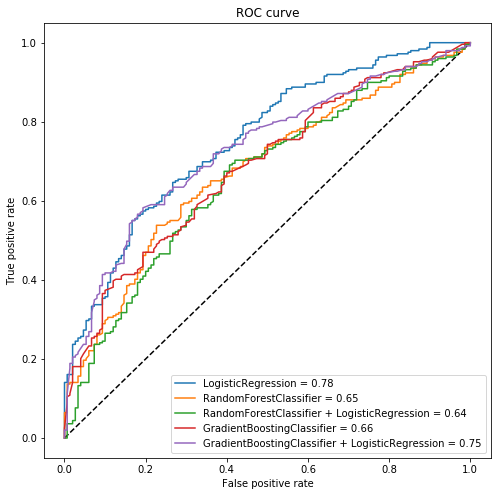

In [43]:
# Unsupervised transformation based on totally random trees
n_estimator = 10
rt = RandomTreesEmbedding(max_depth=5, n_estimators=n_estimator, random_state=0)

features_train, features_train_lr, output_train, output_train_lr = train_test_split(nba_features_train, nba_labels_train, test_size=0.7, random_state=0)

#rt_lm = LogisticRegression()
pr, r, _ = roc_curve(nba_labels_test, y_pred, pos_label = 1)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=10, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(nba_features_train, nba_labels_train)
rf_enc.fit(rf.apply(nba_features_train))
rf_lm.fit(rf_enc.transform(rf.apply(features_train_lr)), output_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(nba_features_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(nba_labels_test, y_pred_rf_lm, pos_label = 1)
score_rf_lm = rf_lm.score(rf_enc.transform(rf.apply(nba_features_test)), nba_labels_test)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(features_train, output_train)
grd_enc.fit(grd.apply(features_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(features_train_lr)[:, :, 0]), output_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(nba_features_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(nba_labels_test, y_pred_grd_lm, pos_label = 1)
score_grd_lm = grd_lm.score(grd_enc.transform(grd.apply(features_train_lr)[:, :, 0]), output_train_lr)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(nba_features_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(nba_labels_test, y_pred_grd, pos_label = 1)
score_grd = grd.score(nba_features_test, nba_labels_test)


# The random forest model by itself
y_pred_rf = rf.predict_proba(nba_features_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(nba_labels_test, y_pred_rf, pos_label = 1)
score_rf = rf.score(nba_features_test, nba_labels_test)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(pr, r, label=('LogisticRegression = %0.2f' % score))
plt.plot(fpr_rf, tpr_rf, label=('RandomForestClassifier = %0.2f' % score_rf))
plt.plot(fpr_rf_lm, tpr_rf_lm, label=('RandomForestClassifier + LogisticRegression = %0.2f' % score_rf_lm ))
plt.plot(fpr_grd, tpr_grd, label=('GradientBoostingClassifier = %0.2f' % score_grd))
plt.plot(fpr_grd_lm, tpr_grd_lm, label=('GradientBoostingClassifier + LogisticRegression = %0.2f' % score_grd_lm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()